In [1]:
import pandas as pd
from pandas import set_option
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Algorithm imports
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay as CMDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error, r2_score

In [3]:
#setting matplotlib background
%matplotlib inline

## Reading data

In [4]:
data = pd.read_csv('adm_data.csv')
data = data.drop('Serial No.', axis=1)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


## General info about dataset

In [5]:
print("shape:", data.shape)
print("\nhas duplicates:", data.duplicated().all())
for col in data.columns:
    print('---------------------------')
    print("column:", col)
    print("data types:", data[col].dtypes)
    hasNaN = data[col].isnull().values.any()
    print("has NaN:", hasNaN)
    if hasNaN:
        print('NaN index:', data[data[col].isnull()].index.tolist())

shape: (400, 8)

has duplicates: False
---------------------------
column: GRE Score
data types: int64
has NaN: False
---------------------------
column: TOEFL Score
data types: int64
has NaN: False
---------------------------
column: University Rating
data types: int64
has NaN: False
---------------------------
column: SOP
data types: float64
has NaN: False
---------------------------
column: LOR 
data types: float64
has NaN: False
---------------------------
column: CGPA
data types: float64
has NaN: False
---------------------------
column: Research
data types: int64
has NaN: False
---------------------------
column: Chance of Admit 
data types: float64
has NaN: False


## Statistical info about dataset

In [6]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Correlations Between Attributes

In [7]:
set_option('display.width', 100)
set_option('display.precision', 3)
correlations = data.corr(method='pearson')
correlations.style.background_gradient(cmap='coolwarm')


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


## Correlation Matrix Plot

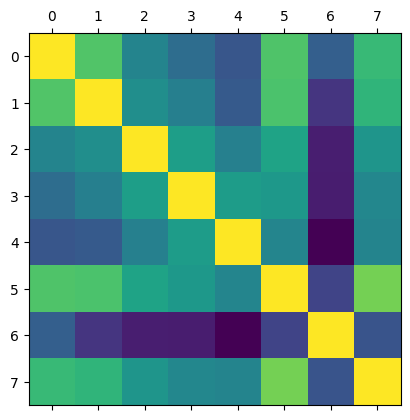

In [8]:
plt.matshow(data.corr())
plt.show()

## Skew of Univariate Distributions

In [9]:
skew = data.skew()
skew

GRE Score           -0.063
TOEFL Score          0.057
University Rating    0.171
SOP                 -0.276
LOR                 -0.107
CGPA                -0.066
Research            -0.192
Chance of Admit     -0.353
dtype: float64

## Histograms

GRE Score


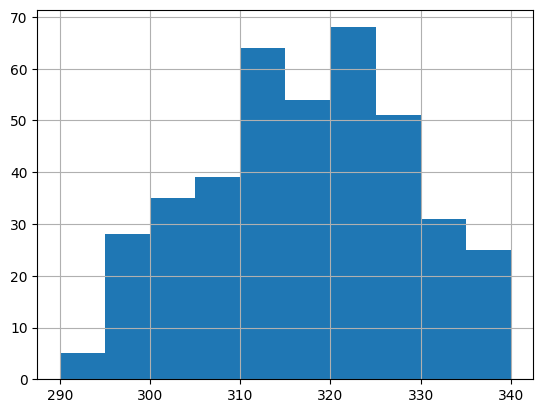



TOEFL Score


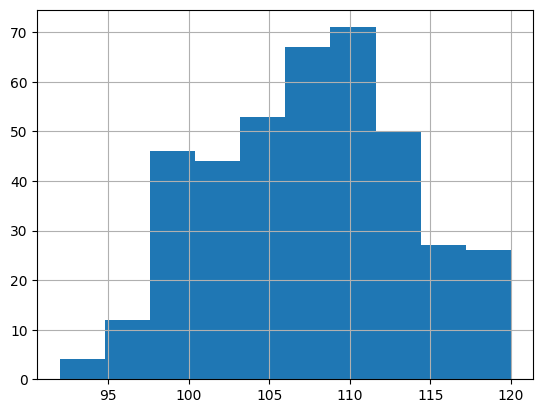



University Rating


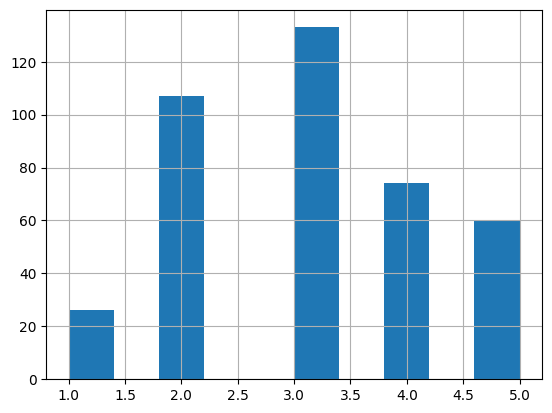



SOP


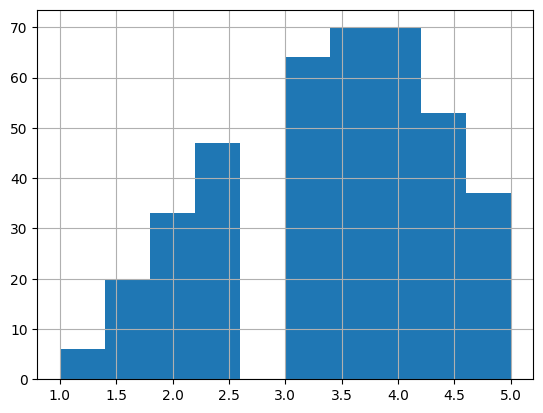



LOR 


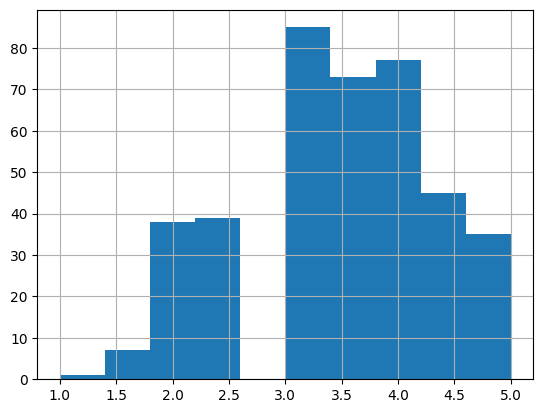



CGPA


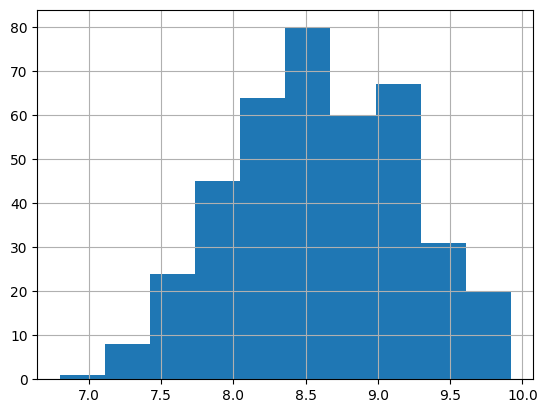



Research


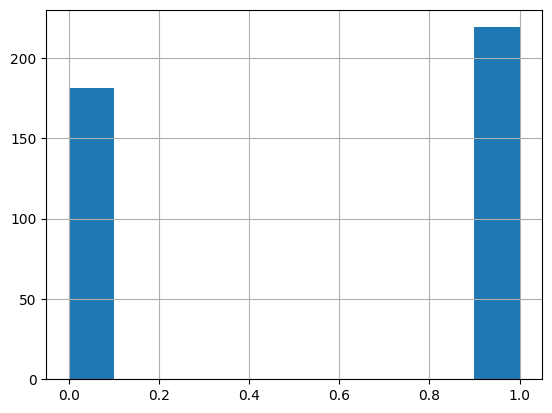



Chance of Admit 


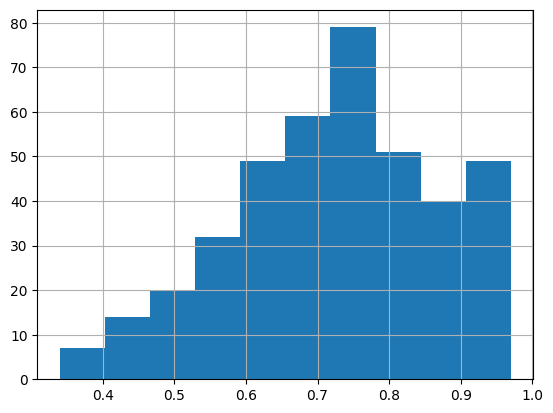

In [10]:
for i in range(0 , len(data.columns)):
    data.iloc[:,i].hist()
    print(data.columns[i])
    plt.show()
    print("\n")



## Box and Whisker Plots

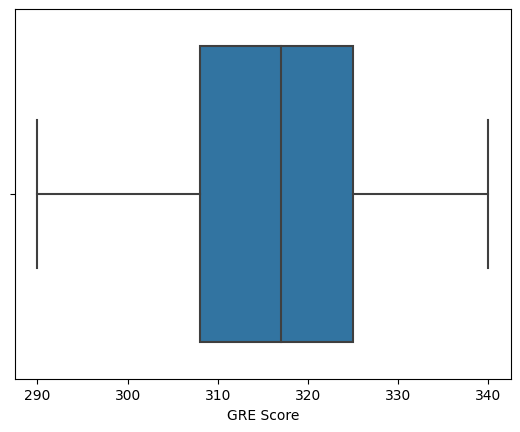

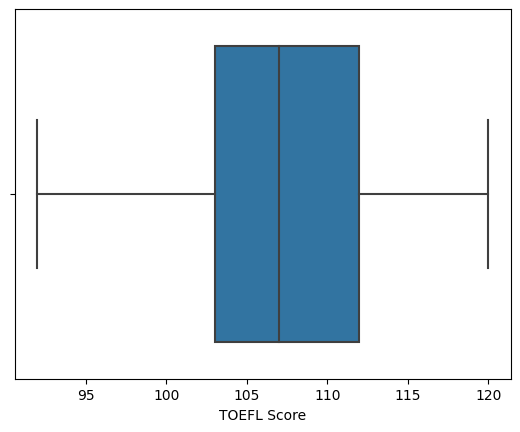

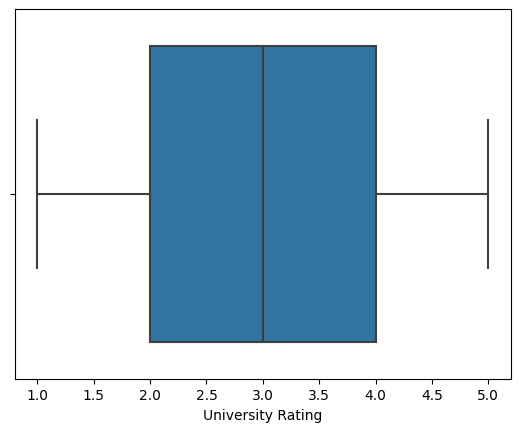

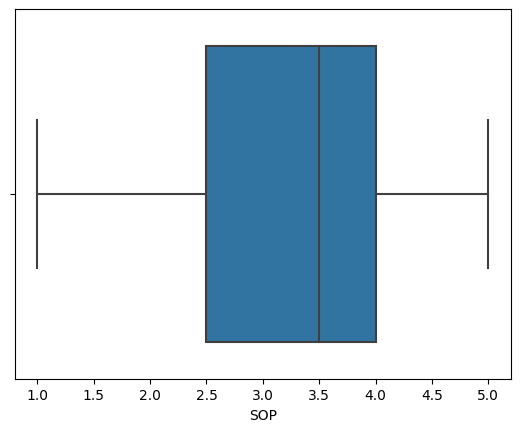

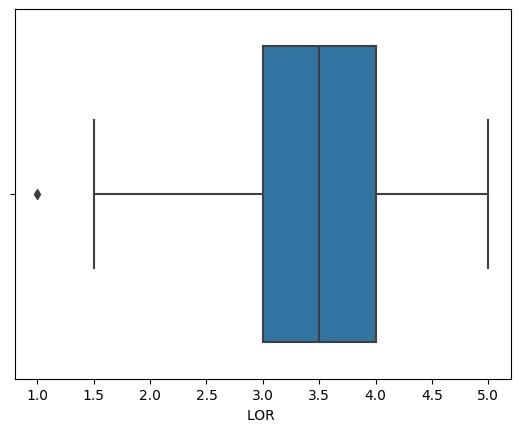

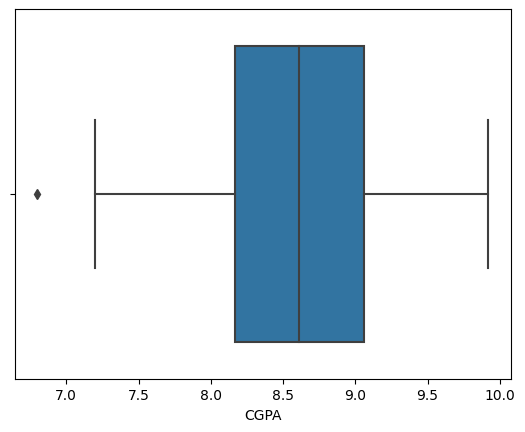

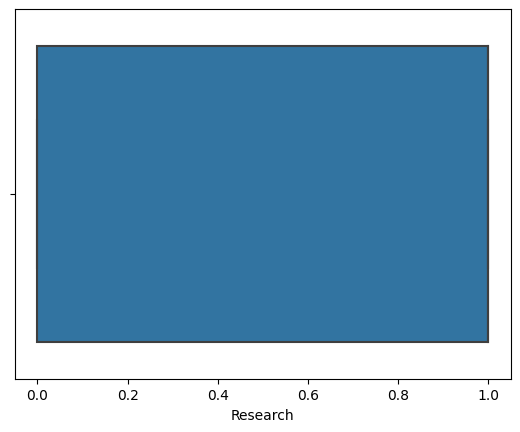

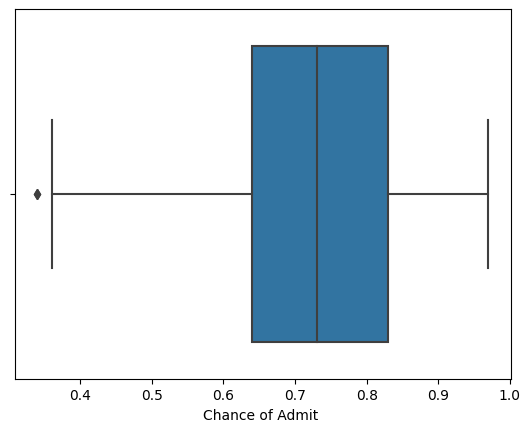

In [11]:
for i in range(0 , len(data.columns)):
    temp = data.iloc[:,i]
    sns.boxplot( x = temp );
    plt.show()
    print("\n")

## Splitting x and y

In [12]:
feature_col = data.columns[0:8]
x = data[feature_col]
y = data[['Chance of Admit ']]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


## Normalization

In [13]:
scaler = preprocessing.StandardScaler()
x_normal = scaler.fit(x).transform(x.astype(float))
x_normal = pd.DataFrame(x_normal, columns=x.columns)
x_normal

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.762,1.747,0.799,1.094,1.167,1.765,0.909,1.374
1,0.628,-0.068,0.799,0.597,1.167,0.455,0.909,0.250
2,-0.070,-0.563,-0.077,-0.398,0.053,-1.006,0.909,-0.031
3,0.453,0.427,-0.077,0.099,-1.061,0.119,0.909,0.531
4,-0.245,-0.727,-0.952,-1.392,-0.504,-0.653,-1.100,-0.522
...,...,...,...,...,...,...,...,...
395,0.628,0.427,-0.077,0.099,0.053,0.741,0.909,0.672
396,0.715,-0.068,-0.077,-0.398,0.053,0.858,0.909,0.812
397,1.151,1.417,0.799,1.591,1.167,1.429,0.909,1.303
398,-0.420,-0.727,-0.077,0.099,0.610,0.304,-1.100,-0.382


## Spliting train and test sets

In [14]:
features = x_normal

# Get the split indexes
strat_shuf_split = ShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(features, y))

# Create the dataframes
X_train = features.loc[train_idx, features.columns]
y_train = pd.DataFrame(y.values).loc[train_idx]

X_test  = features.loc[test_idx, features.columns]
y_test  = pd.DataFrame(y.values).loc[test_idx]

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


0.72    0.039
0.76    0.039
0.70    0.039
0.78    0.039
0.73    0.036
0.64    0.032
0.65    0.029
0.71    0.029
0.80    0.029
0.75    0.025
0.57    0.025
0.79    0.025
0.62    0.025
0.89    0.025
0.68    0.025
0.91    0.025
0.77    0.025
0.94    0.025
0.81    0.025
0.67    0.021
0.69    0.021
0.84    0.021
0.82    0.021
0.85    0.018
0.63    0.018
0.87    0.018
0.52    0.018
0.93    0.018
0.96    0.018
0.74    0.018
0.86    0.014
0.90    0.014
0.47    0.014
0.92    0.014
0.95    0.014
0.88    0.011
0.97    0.011
0.58    0.011
0.42    0.011
0.56    0.011
0.54    0.011
0.66    0.011
0.49    0.011
0.46    0.007
0.61    0.007
0.38    0.007
0.59    0.007
0.50    0.007
0.36    0.004
0.44    0.004
0.45    0.004
0.53    0.004
0.48    0.004
0.51    0.004
0.55    0.004
0.83    0.004
0.60    0.004
0.34    0.004
Name: proportion, dtype: float64
0.71    0.067
0.64    0.067
0.74    0.050
0.61    0.042
0.79    0.042
0.94    0.042
0.93    0.033
0.72    0.033
0.90    0.033
0.66    0.033
0.86    0.033
0

## creating Results DataFrame

In [15]:
Results = pd.DataFrame(columns=['MAE','MSE','MAPE','MPE', 'RMSE', 'R-squared'], 
                  index=['Linear Regression','K-Nearest Neighbours', 'Support Vector Machine', 'Decision Tree'])

In [16]:
# Local functions
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    

# Calculate Mean Percentage Error (MPE)
def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100


## Linear regression

In [17]:
# Standard Linear Regression
lr = LinearRegression().fit(X_train, np.ravel(y_train))

y_pred = lr.predict(X_test)

In [18]:
print(pd.DataFrame(y_pred))
print(y_test)

        0
0    0.68
1    0.68
2    0.90
3    0.79
4    0.44
..    ...
115  0.48
116  0.46
117  0.93
118  0.74
119  0.80

[120 rows x 1 columns]
        0
209  0.68
280  0.68
33   0.90
210  0.79
93   0.44
..    ...
60   0.48
79   0.46
285  0.93
305  0.74
281  0.80

[120 rows x 1 columns]


(120, 8)
(120, 1)


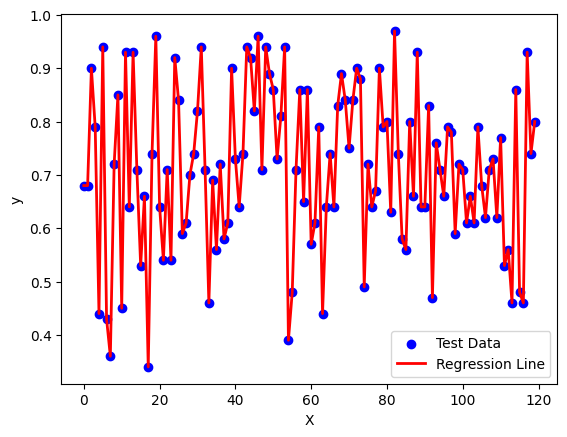

,MAE,MSE,MAPE,MPE,RMSE,R-squared
Linear Regression,0.0,0.0,26.485,-5.437,0.0,1.0
K-Nearest Neighbours,NaN,NaN,NaN,NaN,NaN,NaN
Support Vector Machine,NaN,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# values of y test
y_test = y_test.values

mse = mean_squared_error(y_test, y_pred)

# fill the results df
Results.loc['Linear Regression'] = pd.Series(
    {'MAE':mean_absolute_error(y_test, y_pred) ,
     'MSE':mse,
     'MAPE':mean_absolute_percentage_error(y_test, y_pred),
     'MPE':mean_percentage_error(y_test, y_pred),
     'RMSE':np.sqrt(mse),
     'R-squared':r2_score(y_test, y_pred)})

print(X_test.shape)
print(y_test.shape)


# Plot the data and the regression line
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Test Data')
plt.plot(np.arange(len(y_test)), y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show(), 

Results

## K nearest neighbor

In [20]:
# best k

pred_k = int(np.sqrt(X_test.shape[0]))
print(pred_k)

max_k = 119
mse = list()

for k in range(1, max_k):
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn = knn.fit(X_train, np.ravel(y_train))
    
    y_pred = knn.predict(X_test)
    _mse = mean_squared_error(y_test, y_pred)
    mse.append((k, round(_mse, 4)))
    
mse_results = pd.DataFrame(mse, columns=['K', 'MSE'])


10


Text(0.5, 1.0, 'KNN MSE')

<Figure size 1920x1440 with 0 Axes>

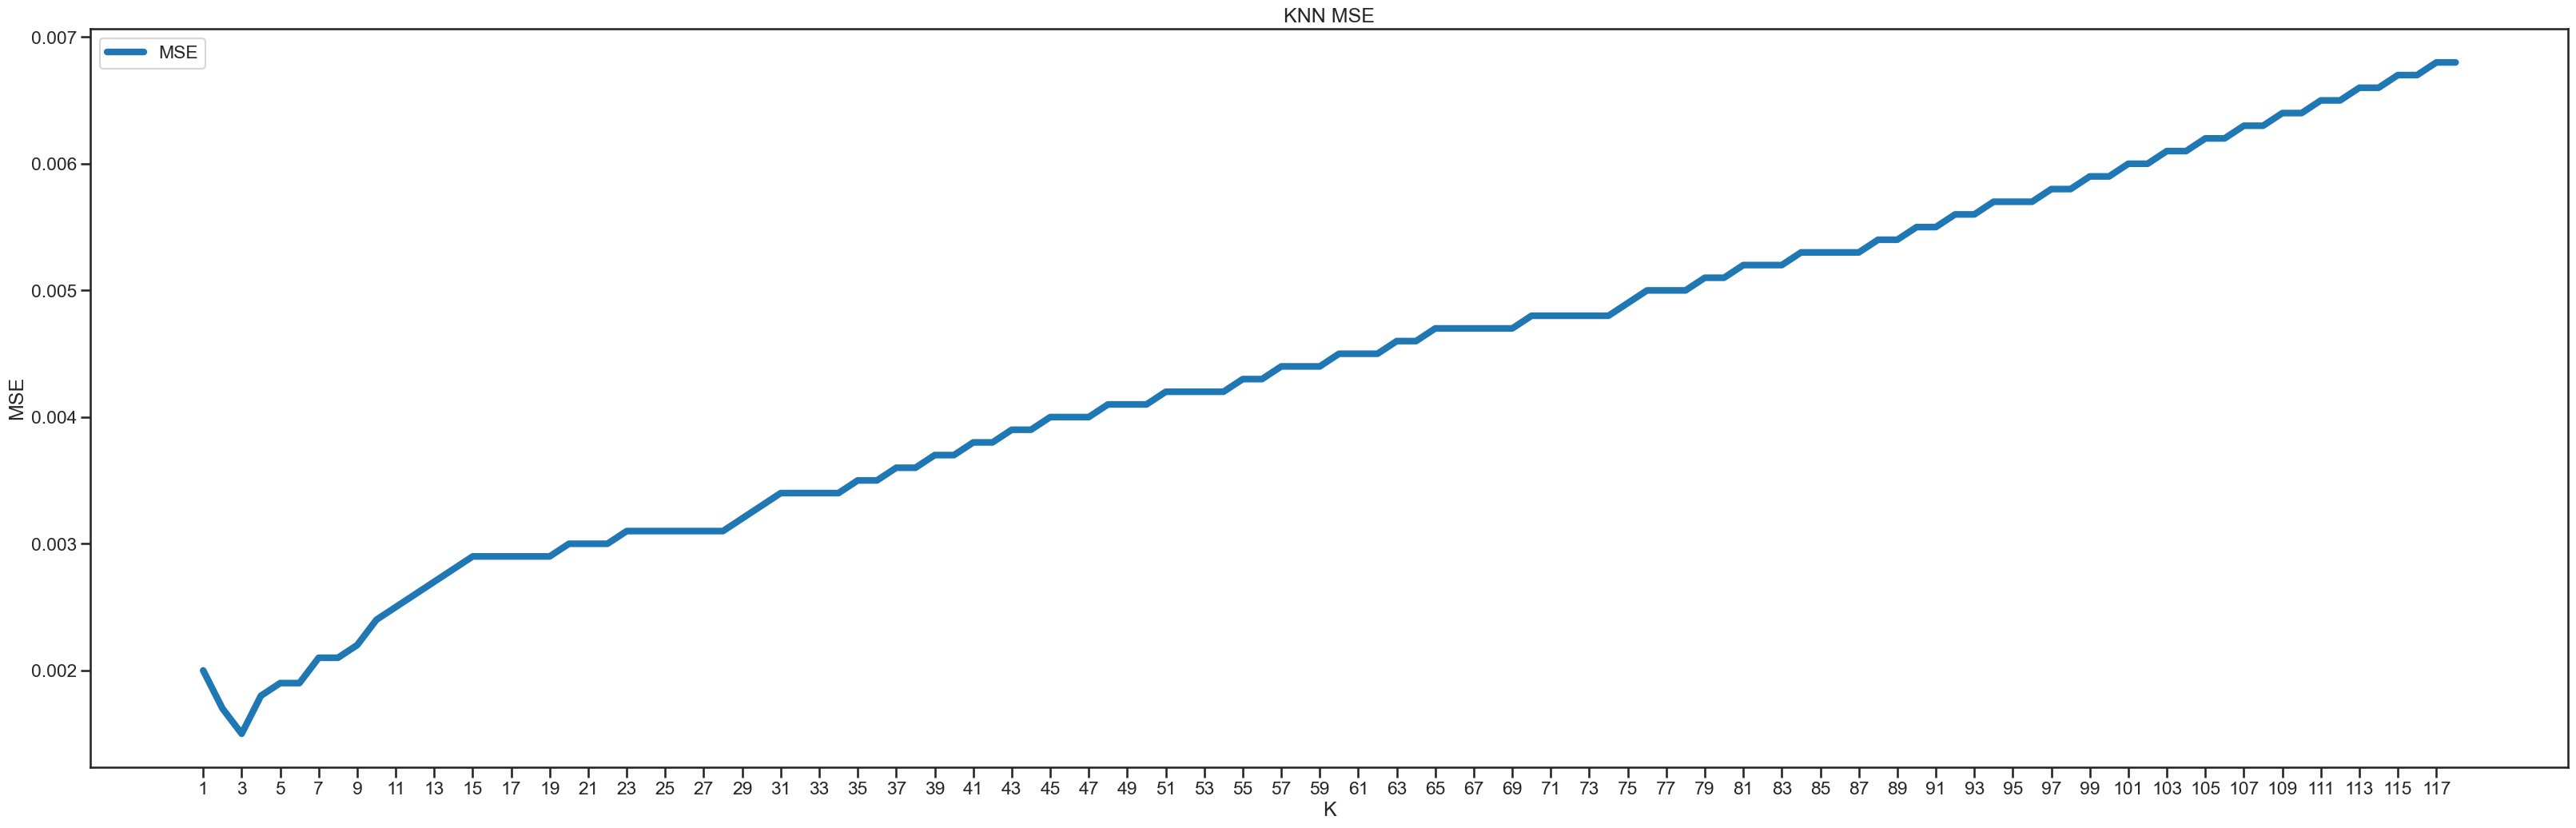

In [21]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = mse_results.set_index('K').plot(figsize=(40, 12), linewidth=6)
ax.set(xlabel='K', ylabel='MSE')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN MSE')

In [22]:
# f1_results.loc[f1_results['F1 Score'] == f1_results.max()[1]]

In [23]:
# error_results.min()
# error_results.loc[error_results['Error Rate'] == error_results.min()[1]]

In [24]:
# KNN with best k
knn = KNeighborsRegressor(n_neighbors=pred_k).fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)

y_pred

array([0.698, 0.734, 0.927, 0.831, 0.565, 0.931, 0.49 , 0.473, 0.669,
       0.819, 0.614, 0.926, 0.637, 0.901, 0.722, 0.615, 0.678, 0.492,
       0.741, 0.943, 0.67 , 0.634, 0.708, 0.533, 0.936, 0.812, 0.655,
       0.604, 0.715, 0.798, 0.803, 0.941, 0.716, 0.503, 0.671, 0.643,
       0.721, 0.663, 0.644, 0.852, 0.746, 0.659, 0.785, 0.945, 0.891,
       0.84 , 0.939, 0.672, 0.927, 0.858, 0.89 , 0.744, 0.826, 0.943,
       0.511, 0.588, 0.684, 0.844, 0.662, 0.883, 0.659, 0.65 , 0.738,
       0.479, 0.643, 0.752, 0.661, 0.823, 0.855, 0.82 , 0.753, 0.8  ,
       0.899, 0.881, 0.517, 0.727, 0.67 , 0.652, 0.903, 0.746, 0.793,
       0.701, 0.956, 0.737, 0.605, 0.615, 0.776, 0.691, 0.922, 0.681,
       0.638, 0.847, 0.534, 0.731, 0.675, 0.657, 0.765, 0.763, 0.537,
       0.78 , 0.69 , 0.684, 0.704, 0.695, 0.754, 0.662, 0.649, 0.662,
       0.682, 0.662, 0.748, 0.632, 0.551, 0.574, 0.797, 0.593, 0.494,
       0.918, 0.759, 0.796])

In [25]:
mse = mean_squared_error(y_test, y_pred)

# fill the results df
Results.loc['K-Nearest Neighbours'] = pd.Series(
    {'MAE':mean_absolute_error(y_test, y_pred) ,
     'MSE':mse,
     'MAPE':mean_absolute_percentage_error(y_test, y_pred),
     'MPE':mean_percentage_error(y_test, y_pred),
     'RMSE':np.sqrt(mse),
     'R-squared':r2_score(y_test, y_pred)})

Results

,MAE,MSE,MAPE,MPE,RMSE,R-squared
Linear Regression,0.0,0.0,26.485,-5.437,0.0,1.0
K-Nearest Neighbours,0.036,0.002,24.735,-7.865,0.049,0.894
Support Vector Machine,NaN,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN,NaN


## Support vector machine

In [26]:

linear =  svm.SVR(kernel='linear', C=1).fit(X_train, np.ravel(y_train))
rbf = svm.SVR(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, np.ravel(y_train))
poly = svm.SVR(kernel='poly', degree=3, C=1).fit(X_train, np.ravel(y_train))
sig = svm.SVR(kernel='sigmoid', C=1).fit(X_train, np.ravel(y_train))

linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_pred)
print('MSE (Linear Kernel): ', "%.2f" % (linear_mse*100))

poly_mse = mean_squared_error(y_test, poly_pred)
print('MSE (Polynomial Kernel): ', "%.2f" % (poly_mse*100))

rbf_mse = mean_squared_error(y_test, rbf_pred)
print('MSE (RBF Kernel): ', "%.2f" % (rbf_mse*100))

sig_mse = mean_squared_error(y_test, sig_pred)
print('MSE (RBF Kernel): ', "%.2f" % (sig_mse*100))

# plotttttt

MSE (Linear Kernel):  0.34
MSE (Polynomial Kernel):  0.34
MSE (RBF Kernel):  0.62
MSE (RBF Kernel):  7983.51


In [27]:
mse = mean_squared_error(y_test, y_pred)

# fill the results df
Results.loc['Support Vector Machine'] = pd.Series(
    {'MAE':mean_absolute_error(y_test, y_pred) ,
     'MSE':mse,
     'MAPE':mean_absolute_percentage_error(y_test, y_pred),
     'MPE':mean_percentage_error(y_test, y_pred),
     'RMSE':np.sqrt(mse),
     'R-squared':r2_score(y_test, y_pred)})

Results

,MAE,MSE,MAPE,MPE,RMSE,R-squared
Linear Regression,0.0,0.0,26.485,-5.437,0.0,1.0
K-Nearest Neighbours,0.036,0.002,24.735,-7.865,0.049,0.894
Support Vector Machine,0.036,0.002,24.735,-7.865,0.049,0.894
Decision Tree,NaN,NaN,NaN,NaN,NaN,NaN


## Decision Tree Rregression

In [28]:
# Create a Decision Tree Regressor model
dt = DecisionTreeRegressor(max_depth=4) 
dt = dt.fit(X_train, np.ravel(y_train))

y_pred = dt.predict(X_test)

dt.tree_.node_count, dt.tree_.max_depth

(31, 4)

In [29]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

In [30]:
mse = mean_squared_error(y_test, y_pred)

# fill the results df
Results.loc['Decision Tree'] = pd.Series(
    {'MAE':mean_absolute_error(y_test, y_pred) ,
     'MSE':mse,
     'MAPE':mean_absolute_percentage_error(y_test, y_pred),
     'MPE':mean_percentage_error(y_test, y_pred),
     'RMSE':np.sqrt(mse),
     'R-squared':r2_score(y_test, y_pred)})

Results

,MAE,MSE,MAPE,MPE,RMSE,R-squared
Linear Regression,0.0,0.0,26.485,-5.437,0.0,1.0
K-Nearest Neighbours,0.036,0.002,24.735,-7.865,0.049,0.894
Support Vector Machine,0.036,0.002,24.735,-7.865,0.049,0.894
Decision Tree,0.01,0.0,26.337,-5.062,0.012,0.994
